<a href="https://www.kaggle.com/code/klyushnik/ensemble-prediction?scriptVersionId=168508407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv
/kaggle/input/cirrhosis-patient-survival-prediction/cirrhosis.csv


# Packets

In [2]:
'''! pip install AutoViz
! pip install xlrd'''

'! pip install AutoViz\n! pip install xlrd'

In [3]:
'''from autoviz.AutoViz_Class import AutoViz_Class'''
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.style.use("fast")
import seaborn as sns
from IPython.display import Image
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder
from functools import partial
from itertools import combinations
from sklearn.model_selection import train_test_split
import optuna
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import itertools
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.gaussian_process.kernels import RBF

In [5]:
import catboost
from catboost import *
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedGroupKFold, RepeatedStratifiedKFold,RepeatedKFold
from mlxtend.classifier import StackingCVClassifier 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier,GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Autoviz

In [6]:
'''AV = AutoViz_Class()
start_time = dt.datetime.now()
print("Started at ", start_time)

dftc = AV.AutoViz('/kaggle/input/playground-series-s3e26/train.csv')'''

'AV = AutoViz_Class()\nstart_time = dt.datetime.now()\nprint("Started at ", start_time)\n\ndftc = AV.AutoViz(\'/kaggle/input/playground-series-s3e26/train.csv\')'

# Data Frame and preparation

In [7]:
train = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")
original = pd.read_csv('/kaggle/input/cirrhosis-patient-survival-prediction/cirrhosis.csv',index_col='ID')

print('Shape train is', train.shape, 'shape test is', test.shape)

Shape train is (7905, 20) shape test is (5271, 19)


In [8]:
#train = pd.concat([train,original], axis=0, ignore_index=True)
print('Shape train is', train.shape, 'shape test is', test.shape)

Shape train is (7905, 20) shape test is (5271, 19)


In [9]:
train

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [10]:
print('Count tatget classes:' , train['Status'].value_counts().unique())

Count tatget classes: [4965 2665  275]


In [11]:
print('Data frame informations:')
train.info()

Data frame informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-nul

In [12]:
print('Describe data informations:')
train.describe()

Describe data informations:


,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [13]:
train_df = train.drop(columns = ['id','Ascites'], axis =1)
test = test.drop(columns = ['id','Ascites'], axis =1)

print('Shape train is', train_df.shape, 'shape test is', test.shape)

Shape train is (7905, 18) shape test is (5271, 17)


In [14]:
for col in train_df.columns:
    pct_missing = np.mean(train_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

N_Days - 0%
Drug - 0%
Age - 0%
Sex - 0%
Hepatomegaly - 0%
Spiders - 0%
Edema - 0%
Bilirubin - 0%
Cholesterol - 0%
Albumin - 0%
Copper - 0%
Alk_Phos - 0%
SGOT - 0%
Tryglicerides - 0%
Platelets - 0%
Prothrombin - 0%
Stage - 0%
Status - 0%


In [15]:
num_rows = len(train_df.index)
low_information_cols = [] #

for col in train_df.columns:
    cnts = train_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [16]:
print('There is no duplicates:')

train = train_df.drop_duplicates()

print(train.shape)
print(train_df.shape)

There is no duplicates:
(7905, 18)
(7905, 18)


# Numeric, object lists

In [17]:
list_numeric = train.select_dtypes(include=('float','int')).columns
list_object = train.select_dtypes(include=('object')).columns
print(list_numeric)
print(list_object)

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
Index(['Drug', 'Sex', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')


In [18]:
for i in list_numeric:
    train[i] = train[i].astype (float)
    test[i] = test[i].astype (float)

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         5271 non-null   float64
 1   Drug           5271 non-null   object 
 2   Age            5271 non-null   float64
 3   Sex            5271 non-null   object 
 4   Hepatomegaly   5271 non-null   object 
 5   Spiders        5271 non-null   object 
 6   Edema          5271 non-null   object 
 7   Bilirubin      5271 non-null   float64
 8   Cholesterol    5271 non-null   float64
 9   Albumin        5271 non-null   float64
 10  Copper         5271 non-null   float64
 11  Alk_Phos       5271 non-null   float64
 12  SGOT           5271 non-null   float64
 13  Tryglicerides  5271 non-null   float64
 14  Platelets      5271 non-null   float64
 15  Prothrombin    5271 non-null   float64
 16  Stage          5271 non-null   float64
dtypes: float64(12), object(5)
memory usage: 700.2+ KB


In [20]:
train = train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
test = test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

print(f"X shape :{train.shape}")
print(f"X_total shape :{test.shape}")

X shape :(7905, 18)
X_total shape :(5271, 17)


# Mark data

In [21]:
train['Status'] = train['Status'].map({"D": 0, "CL": 1, "C": 2})
X = train.drop(columns = ['Status'],axis =1)
y = train.Status
X_total = test
print('Shape X is', X.shape, ', shape y is', y.shape, ', shape X_total is', X_total.shape)

Shape X is (7905, 17) , shape y is (7905,) , shape X_total is (5271, 17)


In [22]:
target_list = X.columns
target_list

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Hepatomegaly', 'Spiders', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

# BaseEstimator, TransformerMixin

In [23]:
class AggFeatureExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_col, agg_col, agg_func):
        self.group_col = group_col
        self.group_col_name = ''
        for col in group_col:
            self.group_col_name += col
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.agg_df = None
        self.medians = None
        
    def fit(self, X, y=None):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        
        self.agg_df = X.groupby(group_col)[agg_col].agg(agg_func)
        self.agg_df.columns = [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]
        self.medians = X[agg_col].median()
        
        return self
    
    def transform(self, X):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        agg_df = self.agg_df
        medians = self.medians
        
        X_merged = pd.merge(X, agg_df, left_on=group_col, right_index=True, how='left')
        X_merged.fillna(medians, inplace=True)
        X_agg = X_merged.loc[:, [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]]
        
        return X_agg
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_agg = self.transform(X)
        return X_agg
class Preprocessor:
    def __init__(self, agg_col, agg_func, group_cols, comb_cat_cols, oh_cat_cols, ce_cat_cols):
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.group_cols = group_cols
        self.comb_cat_cols = comb_cat_cols
        self.oh_cat_cols = oh_cat_cols
        self.ce_cat_cols = ce_cat_cols
        
    def preprocess(self, X_train, X_test):
        X_train = self.create_feature(X_train)
        X_test = self.create_feature(X_test)
        
        agg_train, agg_test = [], []
        for group_col in self.group_cols:
            agg_extractor = AggFeatureExtractor(group_col=group_col, agg_col=self.agg_col, agg_func=self.agg_func)
            agg_extractor.fit(pd.concat([X_train, X_test], axis=0))
            agg_train.append(agg_extractor.transform(X_train))
            agg_test.append(agg_extractor.transform(X_test))
        X_train = pd.concat([X_train] + agg_train, axis=1)
        X_test = pd.concat([X_test] + agg_test, axis=1)

        # create_categorical_combinations
        X_train, _ = self.create_categorical_combinations(X_train, self.comb_cat_cols)
        X_test, _ = self.create_categorical_combinations(X_test, self.comb_cat_cols)
        
        # OneHotEncoder
        onehot_train, onehot_test = self.encode_categorical_features(X_train, X_test, self.oh_cat_cols, encoder_type='onehot')

        # CountEncoder
        count_train, count_test = self.encode_categorical_features(X_train, X_test, self.ce_cat_cols, encoder_type='count')

        X_train = pd.concat([X_train, onehot_train, count_train], axis=1).drop(self.ce_cat_cols, axis=1)
        X_test = pd.concat([X_test, onehot_test, count_test], axis=1).drop(self.ce_cat_cols, axis=1)
        
        return X_train, X_test
        
    def create_feature(self, df):
        transform = PowerTransformer(method='yeo-johnson')
        
        for i in list_numeric:
            df[i+'+log'] = (df[i]+1).transform(np.log)
            df[i+'+log1'] = (df[i]+1).transform(np.log1p)
            df[i+'+y_j'] = transform.fit_transform(df[[i]])
        return df

    def create_categorical_combinations(self, df, categorical_columns, max_pattern=3):
        cols = []
        for comb in range(len(categorical_columns)):
            for col in combinations(categorical_columns, comb+1):
                if len(list(col)) > max_pattern:
                    break
                if len(list(col)) > 1:
                    col_names = list(col)
                    new_col = '_'.join(col_names)
                    df[new_col] = df[col_names[0]].astype(str)
                    for c in col_names[1:]:
                        df[new_col] = df[new_col] + '_' + df[c].astype(str)
                cols.append('_'.join(col))
        return df, cols
    
    def encode_categorical_features(self, X_train, X_test, categorical_columns, encoder_type):
        if encoder_type == 'onehot':
            encoder = OneHotEncoder(cols=categorical_columns)
            train_encoder = encoder.fit_transform(X_train[categorical_columns]).add_suffix('_ohe')
            test_encoder = encoder.transform(X_test[categorical_columns]).add_suffix('_ohe')
        elif encoder_type == 'count':
            encoder = CountEncoder(cols=categorical_columns)
            train_encoder = encoder.fit_transform(X_train[categorical_columns]).add_suffix('_count')
            test_encoder = encoder.transform(X_test[categorical_columns]).add_suffix('_count')
        else:
            raise ValueError("Unsupported encoder type. Available options: 'onehot', 'count'")

        return train_encoder, test_encoder

In [24]:
X_select = X.select_dtypes(include=('float','int'))
X_select

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,999.0,21532.0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,2574.0,19237.0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3428.0,13727.0,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,2576.0,18460.0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,788.0,16658.0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166.0,16839.0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0
7901,1492.0,17031.0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0
7902,1576.0,25873.0,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0
7903,3584.0,22960.0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0


In [25]:
%%time
agg_col = list_numeric
agg_func = ['mean', 'std']
group_cols = [['Drug'], 
              ['Sex'], 
              ['Hepatomegaly'], 
              ['Drug', 'Sex'], 
              ['Drug', 'Hepatomegaly'], 
              ['Sex', 'Hepatomegaly'], 
              ['Drug', 'Sex', 'Hepatomegaly']]
comb_categorical_columns = ['Drug', 'Sex', 'Hepatomegaly', 'Spiders', 'Edema']
oh_categorical_columns = ['Drug', 'Sex', 'Hepatomegaly', 'Spiders', 'Edema',
                          'Drug_Sex', 'Drug_Hepatomegaly', 'Drug_Spiders', 'Drug_Edema',
                          'Sex_Hepatomegaly', 'Sex_Spiders', 'Sex_Edema', 'Hepatomegaly_Spiders',
                          'Hepatomegaly_Edema', 'Spiders_Edema', 'Drug_Sex_Hepatomegaly',
                          'Drug_Sex_Spiders', 'Drug_Sex_Edema', 'Drug_Hepatomegaly_Spiders',
                          'Drug_Hepatomegaly_Edema', 'Drug_Spiders_Edema',
                          'Sex_Hepatomegaly_Spiders', 'Sex_Hepatomegaly_Edema',
                          'Sex_Spiders_Edema', 'Hepatomegaly_Spiders_Edema']
ce_categorical_columns = ['Drug', 'Sex', 'Hepatomegaly', 'Spiders', 'Edema',
                          'Drug_Sex','Drug_Hepatomegaly', 'Drug_Spiders', 'Drug_Edema',
                          'Sex_Hepatomegaly', 'Sex_Spiders', 'Sex_Edema', 'Hepatomegaly_Spiders',
                          'Hepatomegaly_Edema', 'Spiders_Edema', 'Drug_Sex_Hepatomegaly',
                          'Drug_Sex_Spiders', 'Drug_Sex_Edema', 'Drug_Hepatomegaly_Spiders',
                          'Drug_Hepatomegaly_Edema', 'Drug_Spiders_Edema',
                          'Sex_Hepatomegaly_Spiders', 'Sex_Hepatomegaly_Edema',
                          'Sex_Spiders_Edema', 'Hepatomegaly_Spiders_Edema']

pp = Preprocessor(agg_col, agg_func, group_cols, comb_categorical_columns, oh_categorical_columns, ce_categorical_columns)
X, X_total = pp.preprocess(X, X_total)

print(f"X shape :{X.shape} , y shape :{y.shape}")
print(f"X_total shape :{X_total.shape}")

X shape :(7905, 404) , y shape :(7905,)
X_total shape :(5271, 404)
CPU times: user 2.37 s, sys: 131 ms, total: 2.51 s
Wall time: 2.51 s


In [26]:
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_total = X_total.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

print(f"X shape :{X.shape} , y shape :{y.shape}")
print(f"X_total shape :{X_total.shape}")

X shape :(7905, 404) , y shape :(7905,)
X_total shape :(5271, 404)


# Polynomial Features

In [27]:
def PolynomialFeatures_labeled(input_df,power):
   
    poly = preprocessing.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s+%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + "x" + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

output_df = PolynomialFeatures_labeled(X[list_numeric],2)
output_df_t = PolynomialFeatures_labeled(X_total[list_numeric],2)

In [28]:
X =  pd.concat([X.reset_index(drop=True), output_df], axis = 1)
X_total = pd.concat([X_total.reset_index(drop=True), output_df_t], axis = 1)

print(f"X shape :{X.shape} , y shape :{y.shape}")
print(f"X_total shape :{X_total.shape}")

X shape :(7905, 495) , y shape :(7905,)
X_total shape :(5271, 495)


In [29]:
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_total = X_total.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

print(f"X shape :{X.shape} , y shape :{y.shape}")
print(f"X_total shape :{X_total.shape}")

X shape :(7905, 495) , y shape :(7905,)
X_total shape :(5271, 495)


# Threshold

In [30]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]

In [31]:
X = variance_threshold(X,0.4)
list_name = (X.columns)
X_total = X_total[list_name]

print('Shape test =', X_total.shape)
print('Shape train =', X.shape)

Shape test = (5271, 257)
Shape train = (7905, 257)


# Principal component analysis (PCA) 

In [32]:
pca_list = []

for i in X.columns:
    if i not in target_list:
        pca_list.append(i)

In [33]:
df_target_train = X[pca_list]
df_target_test = X_total[pca_list]
scaler = StandardScaler()
df_target_train = scaler.fit_transform(df_target_train)
df_target_test = scaler.fit_transform(df_target_test)

In [34]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_target_train)
principalComponents_test = pca.fit_transform(df_target_test)

In [35]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDftest = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1', 'principal component 2'])

In [36]:
X = X.drop(pca_list, axis='columns')
X_total = X_total.drop(pca_list, axis='columns')
finalDf = pd.concat([X, principalDf], axis = 1)
finalDftest = pd.concat([X_total, principalDftest], axis = 1)

In [37]:
finalDf

,N_Days,Age,Bilirubin,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,principal component 1,principal component 2
0,999.0,21532.0,2.3,316.0,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2.009960,21.361893
1,2574.0,19237.0,0.9,364.0,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,-8.562544,-1.097699
2,3428.0,13727.0,3.3,299.0,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,8.577439,-3.119754
3,2576.0,18460.0,0.6,256.0,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,-9.085222,-1.185391
4,788.0,16658.0,1.1,346.0,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,6.551229,-4.753586
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166.0,16839.0,0.8,309.0,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,-9.562196,1.179531
7901,1492.0,17031.0,0.9,260.0,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,6.112485,-4.822284
7902,1576.0,25873.0,2.0,225.0,51.0,933.0,69.75,62.0,200.0,12.7,2.0,-6.464113,3.214039
7903,3584.0,22960.0,0.7,248.0,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,10.033357,18.591448


In [38]:
finalDftest

,N_Days,Age,Bilirubin,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,principal component 1,principal component 2
0,3839.0,19724.0,1.2,546.0,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,5.085007,-1.419769
1,2468.0,14975.0,1.1,660.0,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,-9.247691,1.039055
2,51.0,13149.0,2.0,151.0,46.0,961.0,69.75,101.0,213.0,13.0,4.0,8.238847,-3.936887
3,2330.0,20510.0,0.6,293.0,40.0,554.0,125.55,56.0,270.0,10.6,2.0,-10.658101,0.870539
4,1615.0,21904.0,1.4,277.0,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,5.534502,-1.479168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,2870.0,12279.0,1.3,302.0,75.0,1345.0,145.00,44.0,181.0,10.6,3.0,-8.931102,-1.493421
5267,1770.0,24803.0,0.5,219.0,121.0,663.0,79.05,94.0,311.0,9.7,3.0,-8.867580,-0.752222
5268,3707.0,16990.0,0.8,315.0,13.0,1637.0,170.50,70.0,426.0,10.9,3.0,4.411786,-1.867208
5269,1216.0,11773.0,0.7,329.0,52.0,678.0,57.00,126.0,306.0,10.2,1.0,-10.231587,-1.403818


# SMOTE

In [39]:
'''from imblearn.pipeline import Pipeline as pp
over = SMOTE()
under = RandomUnderSampler(sampling_strategy='majority')

steps = [('o', over), ('u', under)]
pipeline = pp(steps=steps)

finalDf, y = pipeline.fit_resample(finalDf, y)

counter = Counter(y)
print(counter)'''

"from imblearn.pipeline import Pipeline as pp\nover = SMOTE()\nunder = RandomUnderSampler(sampling_strategy='majority')\n\nsteps = [('o', over), ('u', under)]\npipeline = pp(steps=steps)\n\nfinalDf, y = pipeline.fit_resample(finalDf, y)\n\ncounter = Counter(y)\nprint(counter)"

In [40]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks


# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
finalDf, y = resample.fit_resample(finalDf, y)

counter = Counter(y)
print(counter)

Counter({2: 4965, 1: 4965, 0: 4697})


In [41]:
X_train, X_test, y_train, y_test = train_test_split(finalDf, y, train_size=0.45, random_state=42)

# Optuna tune

In [42]:
def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')
    
    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1 : (len(lines) - 4)]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().replace(' avg', '-avg').split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]
    
    plt.figure(figsize=(10,10))

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Classes')
    plt.xlabel('Metrics')
    plt.tight_layout()

In [43]:
def objective(trial):
    model = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-03-24 05:37:08,285] A new study created in memory with name: no-name-0d5b159c-dffc-4eb2-b9b7-600d98c99997
[I 2024-03-24 05:37:12,973] Trial 0 finished with value: 0.7359850839030454 and parameters: {'iterations': 211, 'learning_rate': 0.0023876430750111896, 'depth': 8, 'l2_leaf_reg': 17.318927293689207, 'bootstrap_type': 'Bayesian', 'random_strength': 0.1793833556542056, 'bagging_temperature': 0.2582019944064273, 'od_type': 'Iter', 'od_wait': 16}. Best is trial 0 with value: 0.7359850839030454.
[I 2024-03-24 05:37:44,977] Trial 1 finished with value: 0.8962088253573648 and parameters: {'iterations': 852, 'learning_rate': 0.05884321267371217, 'depth': 9, 'l2_leaf_reg': 2.5990988504567968e-08, 'bootstrap_type': 'Bayesian', 'random_strength': 0.0007683484138578562, 'bagging_temperature': 5.559357316532733, 'od_type': 'IncToDec', 'od_wait': 44}. Best is trial 1 with value: 0.8962088253573648.
[I 2024-03-24 05:38:07,751] Trial 2 finished with value: 0.8773151025481666 and parameters

Number of finished trials: 50
Best trial:
  Value: 0.9001864512119329
  Params: 
    iterations: 785
    learning_rate: 0.09585879697339904
    depth: 10
    l2_leaf_reg: 1.009796169720522e-07
    bootstrap_type: Bayesian
    random_strength: 3.013119810134734e-07
    bagging_temperature: 0.15762107292472383
    od_type: IncToDec
    od_wait: 24


              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2650
           1       0.93      0.98      0.96      2676
           2       0.88      0.88      0.88      2719

    accuracy                           0.90      8045
   macro avg       0.90      0.90      0.90      8045
weighted avg       0.90      0.90      0.90      8045



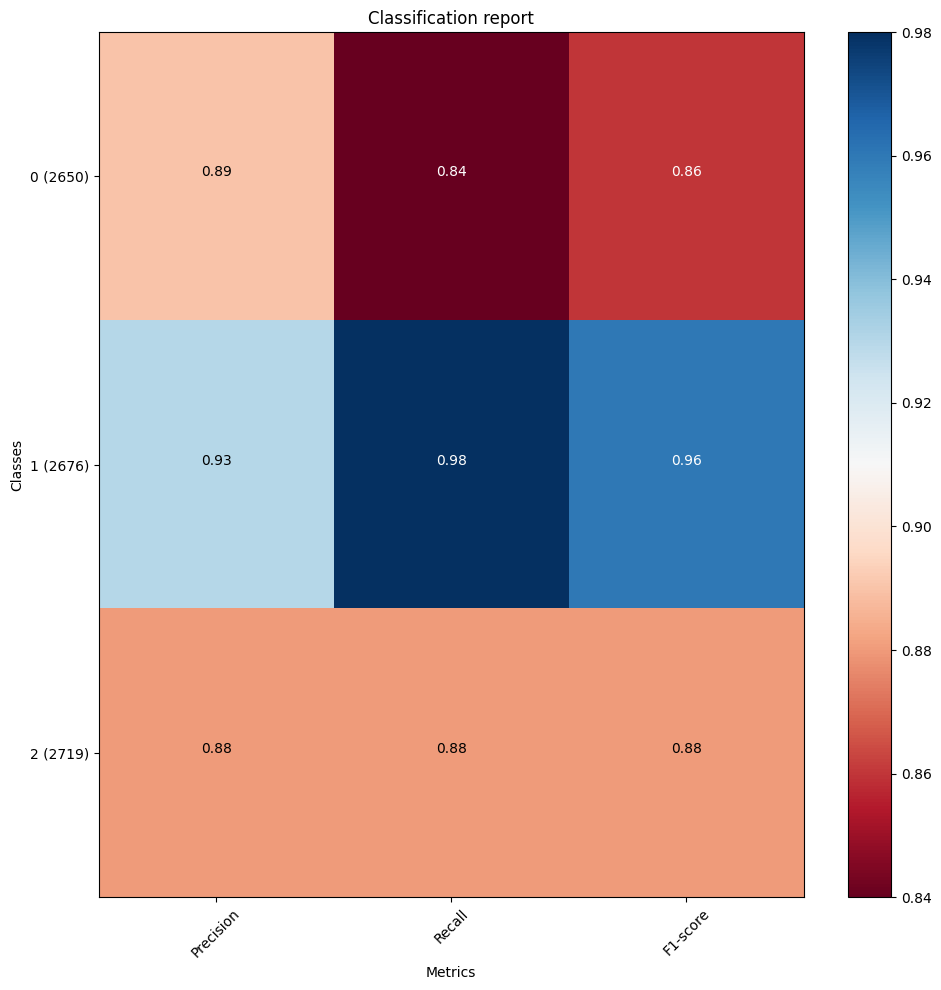

In [44]:
ct_best = study.best_params
model = catboost.CatBoostClassifier(**ct_best, verbose = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
clf =classification_report(y_test, y_pred)
plot_classification_report(clf)
print(clf)

In [45]:
train_y_label = y_train
valid_y_label = y_test
dtrain = lgb.Dataset(X_train, label=train_y_label)

# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_pre_filter' : False
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = []
    for i in range(0,len(preds)):
        pred_labels.append(np.argmax(preds[i]))
    accuracy = cal_acc(valid_y_label, pred_labels)
    return accuracy

def cal_acc(true, pred):
    return np.mean(true==pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-03-24 06:03:25,619] A new study created in memory with name: no-name-bbf2b5a3-69e5-46c8-9c25-3acdae5bb8e3


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:03:26,193] Trial 0 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.011559050085848293, 'lambda_l2': 0.0003119652091374003, 'num_leaves': 22, 'feature_fraction': 0.9566728279147663, 'bagging_fraction': 0.6440588707322674, 'bagging_freq': 2, 'min_child_samples': 97}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:27,395] Trial 1 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 2.4220310338631754, 'lambda_l2': 1.440532867297172e-06, 'num_leaves': 138, 'feature_fraction': 0.4941098448530414, 'bagging_fraction': 0.7455312276951711, 'bagging_freq': 4, 'min_child_samples': 35}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:28,004] Trial 2 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 2.773039278551142, 'lambda_l2': 1.581617130938036e-07, 'num_leaves': 255, 'feature_fraction': 0.6994855366641042, 'bagging_fraction': 0.6543064818111566, 'bagging_freq': 1, 'min_child_samples': 91}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choos

[I 2024-03-24 06:03:28,607] Trial 3 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 1.1569500168585465e-06, 'lambda_l2': 2.8395710120419005e-05, 'num_leaves': 27, 'feature_fraction': 0.9970666932839993, 'bagging_fraction': 0.8167395316218014, 'bagging_freq': 3, 'min_child_samples': 56}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:29,798] Trial 4 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 4.4181748055198924e-08, 'lambda_l2': 0.007298673838489493, 'num_leaves': 72, 'feature_fraction': 0.8405827139658406, 'bagging_fraction': 0.9064018510143378, 'bagging_freq': 1, 'min_child_samples': 67}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:30,654] Trial 5 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.02938540190811319, 'lambda_l2': 2.789340577151168e-07, 'num_leaves': 208, 'feature_fraction': 0.9388534343423165, 'bagging_fraction': 0.5893497476317129, 'bagging_freq': 6, 'min_child_samples': 65}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training fro

[I 2024-03-24 06:03:31,355] Trial 6 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 9.252915736857775, 'lambda_l2': 0.000716727552366617, 'num_leaves': 72, 'feature_fraction': 0.4318868991445207, 'bagging_fraction': 0.6215545869351848, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:31,902] Trial 7 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 2.736204332259623e-06, 'lambda_l2': 0.00043311025185850053, 'num_leaves': 140, 'feature_fraction': 0.8864622796674888, 'bagging_fraction': 0.473278893926936, 'bagging_freq': 7, 'min_child_samples': 93}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set:

[I 2024-03-24 06:03:34,692] Trial 8 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 6.485542306084806e-05, 'lambda_l2': 2.9833075907184126e-08, 'num_leaves': 179, 'feature_fraction': 0.8504995024639382, 'bagging_fraction': 0.42202558951325897, 'bagging_freq': 2, 'min_child_samples': 12}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:35,874] Trial 9 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.007157446436592896, 'lambda_l2': 1.5621808887291882e-06, 'num_leaves': 212, 'feature_fraction': 0.5976412103382058, 'bagging_fraction': 0.9750095152975368, 'bagging_freq': 6, 'min_child_samples': 70}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:03:36,254] Trial 10 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.0014435840222096446, 'lambda_l2': 1.7405379398046341, 'num_leaves': 11, 'feature_fraction': 0.76863719213717, 'bagging_fraction': 0.7732748498969308, 'bagging_freq': 3, 'min_child_samples': 32}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:37,850] Trial 11 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.10844090026563301, 'lambda_l2': 6.8986691058027346e-06, 'num_leaves': 107, 'feature_fraction': 0.5278588699700311, 'bagging_fraction': 0.7288665368069636, 'bagging_freq': 4, 'min_child_samples': 39}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:39,240] Trial 12 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.24064266250824293, 'lambda_l2': 1.149271787274816e-08, 'num_leaves': 134, 'feature_fraction': 0.6671281627275221, 'bagging_fraction': 0.7088434612075682, 'bagging_freq': 5, 'min_child_samples': 41}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:03:40,371] Trial 13 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.4302487769482261, 'lambda_l2': 2.5399382953638336e-05, 'num_leaves': 59, 'feature_fraction': 0.7653277004812018, 'bagging_fraction': 0.5653184650573033, 'bagging_freq': 3, 'min_child_samples': 26}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:41,281] Trial 14 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.006695432738054411, 'lambda_l2': 1.4929809958712487e-06, 'num_leaves': 106, 'feature_fraction': 0.40800666640314864, 'bagging_fraction': 0.7921968352392033, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:42,314] Trial 15 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 1.1740482012656006, 'lambda_l2': 0.014261642849275943, 'num_leaves': 175, 'feature_fraction': 0.5483980723414934, 'bagging_fraction': 0.6827975938267035, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:03:43,118] Trial 16 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.06285283647721461, 'lambda_l2': 6.792851709492328e-05, 'num_leaves': 40, 'feature_fraction': 0.6246148879493718, 'bagging_fraction': 0.5364704056169336, 'bagging_freq': 2, 'min_child_samples': 49}. Best is trial 0 with value: 0.32939714108141704.
[I 2024-03-24 06:03:43,305] Trial 17 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 9.767888472276082, 'lambda_l2': 5.279945888404266e-06, 'num_leaves': 2, 'feature_fraction': 0.7574821342810428, 'bagging_fraction': 0.6618202680808769, 'bagging_freq': 5, 'min_child_samples': 80}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warn

[I 2024-03-24 06:03:44,134] Trial 18 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.0007194731367881107, 'lambda_l2': 2.3896589217453156e-07, 'num_leaves': 98, 'feature_fraction': 0.4732645087338412, 'bagging_fraction': 0.8367118555403481, 'bagging_freq': 3, 'min_child_samples': 100}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:46,140] Trial 19 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.4005015304951523, 'lambda_l2': 0.00031615036802574444, 'num_leaves': 159, 'feature_fraction': 0.502171287537263, 'bagging_fraction': 0.7273960254838249, 'bagging_freq': 1, 'min_child_samples': 23}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:03:49,056] Trial 20 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.016628857440259437, 'lambda_l2': 0.032098365408111715, 'num_leaves': 100, 'feature_fraction': 0.5993543071561229, 'bagging_fraction': 0.6205571507114883, 'bagging_freq': 4, 'min_child_samples': 6}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:49,765] Trial 21 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 1.9050455876076353, 'lambda_l2': 1.110166917065354e-07, 'num_leaves': 240, 'feature_fraction': 0.7040333888406372, 'bagging_fraction': 0.6434812715002356, 'bagging_freq': 1, 'min_child_samples': 86}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:50,465] Trial 22 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 1.2136323190340847, 'lambda_l2': 7.535569344524992e-07, 'num_leaves': 236, 'feature_fraction': 0.6953475171311241, 'bagging_fraction': 0.6823010269050567, 'bagging_freq': 2, 'min_child_samples': 99}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:51,288] Trial 23 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.09210835630096288, 'lambda_l2': 6.511124188387398e-08, 'num_leaves': 203, 'feature_fraction': 0.4633142861063439, 'bagging_fraction': 0.7487023178878793, 'bagging_freq': 1, 'min_child_samples': 88}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training fro

[I 2024-03-24 06:03:51,922] Trial 24 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 2.7305714061040494, 'lambda_l2': 3.643887001234531e-07, 'num_leaves': 159, 'feature_fraction': 0.5586946104400361, 'bagging_fraction': 0.5327308896093301, 'bagging_freq': 2, 'min_child_samples': 76}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-24 06:03:52,686] Trial 25 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.3798879358743943, 'lambda_l2': 3.2420243184945445e-08, 'num_leaves': 36, 'feature_fraction': 0.6439994828991759, 'bagging_fraction': 0.6673001362732527, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:53,259] Trial 26 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 9.121062188373783, 'lambda_l2': 3.4464185223647817e-06, 'num_leaves': 252, 'feature_fraction': 0.5798750062291529, 'bagging_fraction': 0.7588101107318244, 'bagging_freq': 3, 'min_child_samples': 92}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:54,556] Trial 27 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.033507155123335824, 'lambda_l2': 7.20616026197629e-07, 'num_leaves': 122, 'feature_fraction': 0.5353888236529075, 'bagging_fraction': 0.6049489168511832, 'bagging_freq': 4, 'min_child_samples': 40}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:55,500] Trial 28 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.004050585930011159, 'lambda_l2': 1.232034212461078e-05, 'num_leaves': 183, 'feature_fraction': 0.7314424715436365, 'bagging_fraction': 0.7012752174501555, 'bagging_freq': 2, 'min_child_samples': 74}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:56,764] Trial 29 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.13421884115237037, 'lambda_l2': 4.6464611577887346e-05, 'num_leaves': 78, 'feature_fraction': 0.9825613317755291, 'bagging_fraction': 0.8363614519555598, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:03:57,687] Trial 30 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.00027747565472932117, 'lambda_l2': 1.2402390694635713e-08, 'num_leaves': 49, 'feature_fraction': 0.6775196305950547, 'bagging_fraction': 0.8037490088973629, 'bagging_freq': 6, 'min_child_samples': 96}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:03:58,231] Trial 31 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 1.077953562070613e-08, 'lambda_l2': 3.6902781277317276e-06, 'num_leaves': 20, 'feature_fraction': 0.9656332631311755, 'bagging_fraction': 0.8893212638754329, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:03:58,809] Trial 32 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 7.025990030363858e-07, 'lambda_l2': 1.404325290524387e-07, 'num_leaves': 22, 'feature_fraction': 0.920666346374371, 'bagging_fraction': 0.7234405103616482, 'bagging_freq': 3, 'min_child_samples': 46}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:04:00,323] Trial 33 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.045592010720277014, 'lambda_l2': 0.00014414813578334003, 'num_leaves': 82, 'feature_fraction': 0.9839755899345065, 'bagging_fraction': 0.649166028490468, 'bagging_freq': 2, 'min_child_samples': 25}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:01,062] Trial 34 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 4.260536369974907e-05, 'lambda_l2': 2.416319628626747e-05, 'num_leaves': 60, 'feature_fraction': 0.9375162045862374, 'bagging_fraction': 0.5825674703386762, 'bagging_freq': 3, 'min_child_samples': 85}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:04:01,779] Trial 35 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.017473419852080216, 'lambda_l2': 1.5518108286361627e-05, 'num_leaves': 32, 'feature_fraction': 0.8125952873468684, 'bagging_fraction': 0.6324379580377611, 'bagging_freq': 5, 'min_child_samples': 67}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:02,597] Trial 36 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 1.8816210970251355e-07, 'lambda_l2': 0.001495258060762563, 'num_leaves': 218, 'feature_fraction': 0.8996126887620753, 'bagging_fraction': 0.6938460161748516, 'bagging_freq': 4, 'min_child_samples': 91}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:04,674] Trial 37 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 5.383287349158987e-05, 'lambda_l2': 8.519395238224172e-05, 'num_leaves': 198, 'feature_fraction': 0.8384132932019399, 'bagging_fraction': 0.7541804685477662, 'bagging_freq': 7, 'min_child_samples': 32}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:04:07,358] Trial 38 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 3.1021578041266246e-06, 'lambda_l2': 1.7540785067016745e-06, 'num_leaves': 152, 'feature_fraction': 0.8768046309032499, 'bagging_fraction': 0.7977692621730325, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:08,324] Trial 39 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.8709434766162364, 'lambda_l2': 4.31358196575726e-07, 'num_leaves': 124, 'feature_fraction': 0.9967009126727564, 'bagging_fraction': 0.6029651889663847, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:09,530] Trial 40 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 3.1223085537161026, 'lambda_l2': 9.699088417430112e-06, 'num_leaves': 67, 'feature_fraction': 0.930852069427806, 'bagging_fraction': 0.7134349643694614, 'bagging_freq': 1, 'min_child_samples': 31}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore

[I 2024-03-24 06:04:09,997] Trial 41 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.198572483756737, 'lambda_l2': 0.0014762156883896989, 'num_leaves': 15, 'feature_fraction': 0.9643360078921849, 'bagging_fraction': 0.9295698449610644, 'bagging_freq': 1, 'min_child_samples': 70}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:04:11,000] Trial 42 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 4.321784692724522, 'lambda_l2': 0.0003168725751003648, 'num_leaves': 48, 'feature_fraction': 0.7998052284425294, 'bagging_fraction': 0.9681979005505411, 'bagging_freq': 2, 'min_child_samples': 45}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:04:11,694] Trial 43 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.6128950976674334, 'lambda_l2': 1.3002807693651215e-06, 'num_leaves': 29, 'feature_fraction': 0.8731715684489516, 'bagging_fraction': 0.8802888195927338, 'bagging_freq': 1, 'min_child_samples': 65}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450


[I 2024-03-24 06:04:12,014] Trial 44 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.0032386974472346426, 'lambda_l2': 4.0319403053230045e-05, 'num_leaves': 7, 'feature_fraction': 0.9529393704442816, 'bagging_fraction': 0.8262452485241208, 'bagging_freq': 3, 'min_child_samples': 55}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:12,991] Trial 45 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.011243227596973193, 'lambda_l2': 6.471584616514857e-06, 'num_leaves': 81, 'feature_fraction': 0.8974079412259671, 'bagging_fraction': 0.7801724775528823, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:13,905] Trial 46 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.06332792747893459, 'lambda_l2': 0.00511317383010132, 'num_leaves': 50, 'feature_fraction': 0.9157712493941769, 'bagging_fraction': 0.8660287284205077, 'bagging_freq': 1, 'min_child_samples': 96}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:15,556] Trial 47 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.25402673054620084, 'lambda_l2': 0.00014503768092936892, 'num_leaves': 141, 'feature_fraction': 0.8565025762170311, 'bagging_fraction': 0.7355411661387653, 'bagging_freq': 2, 'min_child_samples': 35}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:16,587] Trial 48 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.034242733109899975, 'lambda_l2': 0.0007818926272266171, 'num_leaves': 222, 'feature_fraction': 0.9511023174071112, 'bagging_fraction': 0.7734540304752604, 'bagging_freq': 5, 'min_child_samples': 74}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4535, number of negative: 2047
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3306
[LightGBM] [Info] Number of data points in the train set: 6582, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689000 -> initscore=0.795450
[LightGBM] [Info] Start training from score 0.795450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-03-24 06:04:17,845] Trial 49 finished with value: 0.32939714108141704 and parameters: {'lambda_l1': 0.7929735097120489, 'lambda_l2': 0.07231757619026703, 'num_leaves': 96, 'feature_fraction': 0.9967172531924495, 'bagging_fraction': 0.659893199697883, 'bagging_freq': 3, 'min_child_samples': 47}. Best is trial 0 with value: 0.32939714108141704.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Number of finished trials: 50
Best trial:
  Value: 0.32939714108141704
  Params: 
    lambda_l1: 0.011559050085848293
    lambda_l2: 0.0003119652091374003
    num_leaves: 22
    feature_fraction: 0.9566728279147663
    bagging_fraction: 0.6440588707322674
    bagging_freq: 2
    min_child_samples: 97


[LightGBM] [Warning] lambda_l1 is set=0.011559050085848293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011559050085848293
[LightGBM] [Warning] bagging_fraction is set=0.6440588707322674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6440588707322674
[LightGBM] [Warning] lambda_l2 is set=0.0003119652091374003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003119652091374003
[LightGBM] [Warning] feature_fraction is set=0.9566728279147663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9566728279147663
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2650
           1       0.89      0.94      0.91      2676
           2       0.86      0.89      0.88      2719

    accuracy                           0.88      8045
   macro avg       0.87      0.87      0.8

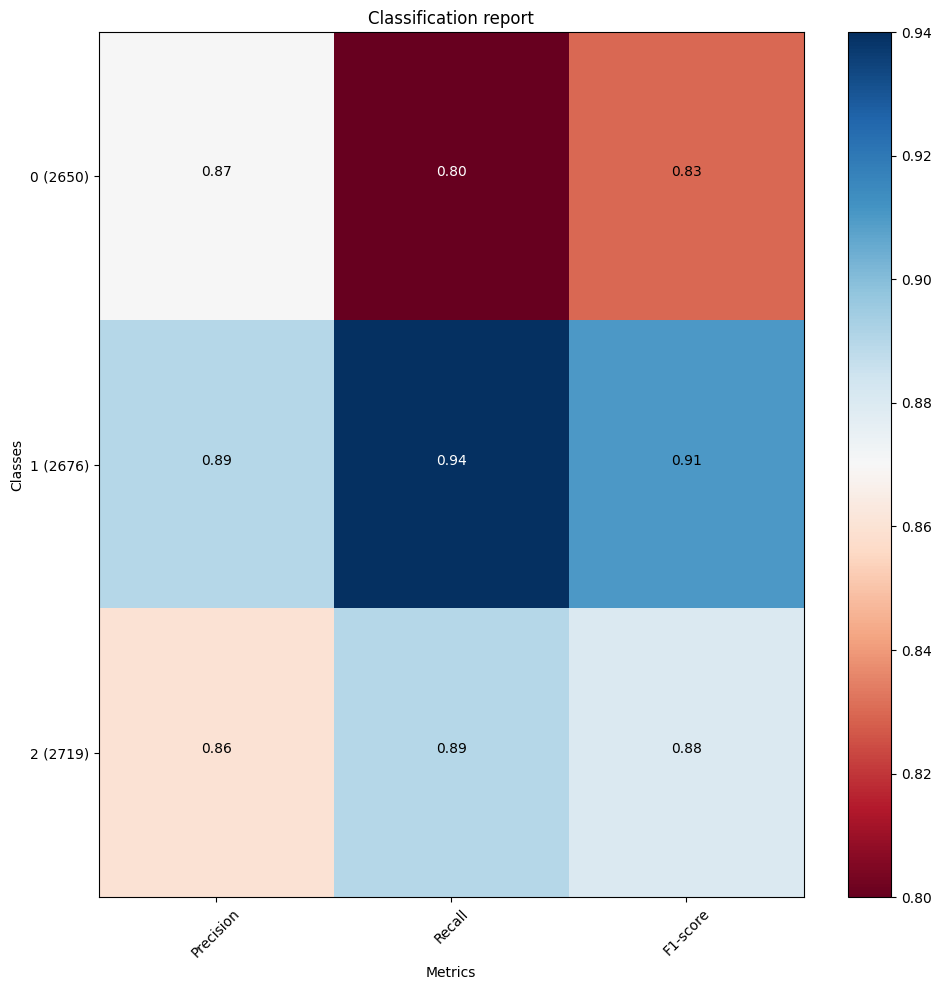

In [46]:
lgb_best = study.best_params
model = lgb.LGBMClassifier(**lgb_best)
model.fit(X_train, train_y_label)
y_pred = model.predict(X_test)
clf =classification_report(valid_y_label, y_pred)
plot_classification_report(clf)
print(clf)

In [47]:
train_y_label = y_train
valid_y_label = y_test
train_x_tr, valid_x_es, train_y_tr, valid_y_es = train_test_split(X_train, train_y_label, test_size=0.2)

dtrain = xgb.DMatrix(train_x_tr, label=train_y_tr)
dtest = xgb.DMatrix(X_test, label=valid_y_label)

def objective(trial):

    param = {
        "verbosity": 0,
        "objective": "multi:softmax",
        "num_class": 5,
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "early_stopping_rounds":200,
        "evals":([valid_x_es,valid_y_es])
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y_label, pred_labels)
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-03-24 06:04:21,020] A new study created in memory with name: no-name-df26b5c8-67e7-4fa7-bc33-6a5140540540
[I 2024-03-24 06:04:21,446] Trial 0 finished with value: 0.7707893101305159 and parameters: {'booster': 'dart', 'lambda': 0.00035024508569089335, 'alpha': 5.076219090298503e-08, 'subsample': 0.7871933780397988, 'colsample_bytree': 0.8251703163975819, 'max_depth': 5, 'min_child_weight': 3, 'eta': 0.0018664955153025779, 'gamma': 1.2087121869303996e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.2491743351226946e-05, 'skip_drop': 0.0009969298485538996}. Best is trial 0 with value: 0.7707893101305159.
[I 2024-03-24 06:04:21,760] Trial 1 finished with value: 0.7550031075201988 and parameters: {'booster': 'gbtree', 'lambda': 8.864579327183252e-08, 'alpha': 0.03159621283087596, 'subsample': 0.5635234706129149, 'colsample_bytree': 0.9928079393546494, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.0013063509339933212, 'gamma': 0

Number of finished trials: 200
Best trial:
  Value: 0.859291485394655
  Params: 
    booster: dart
    lambda: 1.6973526007936797e-06
    alpha: 0.00157661969495043
    subsample: 0.5938951266054292
    colsample_bytree: 0.6319900886527554
    max_depth: 9
    min_child_weight: 2
    eta: 0.4164012826610049
    gamma: 0.019634117187539584
    grow_policy: depthwise
    sample_type: uniform
    normalize_type: forest
    rate_drop: 1.6123738939937968e-08
    skip_drop: 0.0013152521025500544


              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2650
           1       0.90      0.94      0.92      2676
           2       0.86      0.87      0.87      2719

    accuracy                           0.88      8045
   macro avg       0.87      0.88      0.87      8045
weighted avg       0.87      0.88      0.87      8045



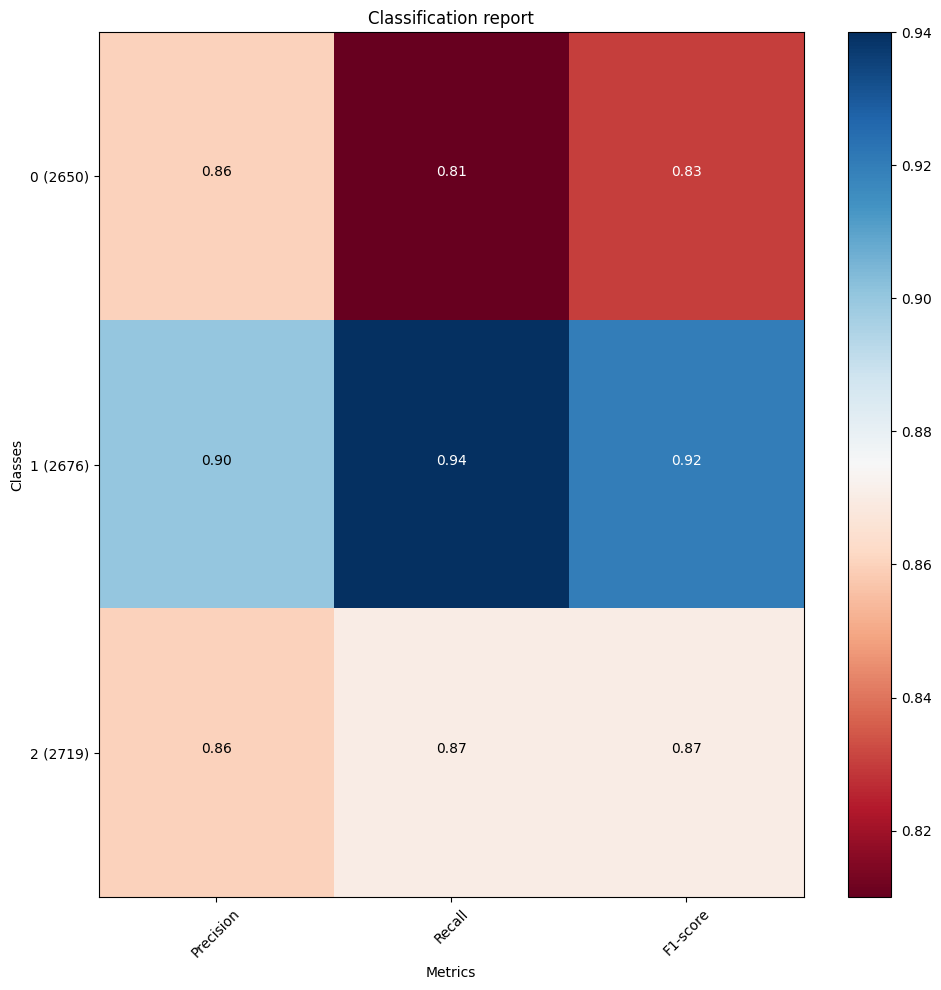

In [48]:
xgb_best = study.best_params
model = xgb.XGBClassifier(**xgb_best)
model.fit(train_x_tr,train_y_tr,eval_set=[(valid_x_es,valid_y_es)],early_stopping_rounds=200,verbose=False)
y_pred = model.predict(X_test)
clf =classification_report(valid_y_label, y_pred)
plot_classification_report(clf)
print(clf)

# Compare ensemble

In [49]:
classifier1 = Pipeline([#('quantil',QuantileTransformer(output_distribution='normal')),
                        ('scaler', StandardScaler()),
                        ('transform',PowerTransformer(method='yeo-johnson')),
                        ('cat',catboost.CatBoostClassifier(**ct_best, verbose = 0))])#
classifier2 = Pipeline([#('quantil',QuantileTransformer(output_distribution='normal')),
                        ('scaler', StandardScaler()),
                        ('transform',PowerTransformer(method='yeo-johnson')),
                        ('lgb',lgb.LGBMClassifier(**lgb_best))])#
classifier3 = Pipeline([#('quantil',QuantileTransformer(output_distribution='normal')),
                        ('impute', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('transform',PowerTransformer(method='yeo-johnson')),
                        ('xgb',xgb.XGBClassifier(**xgb_best))])#
classifier4 = Pipeline([#('quantil',QuantileTransformer(output_distribution='normal')),
                        ('scaler', StandardScaler()),
                        ('transform',PowerTransformer(method='yeo-johnson')),
                        ('hgb',HistGradientBoostingClassifier(loss='log_loss',
                                             learning_rate=0.1,
                                             max_depth=3))])
kernel = 1.0 * RationalQuadratic(alpha=1, length_scale=1)
classifier5 = Pipeline([#('quantil',QuantileTransformer(output_distribution='normal')),
                        ('scaler', StandardScaler()),
                        ('transform',PowerTransformer(method='yeo-johnson')),
                        ('gpc',GaussianProcessClassifier(kernel = kernel,random_state=0))])

sclf =StackingCVClassifier(classifiers = [classifier1, 
                                          classifier2, 
                                          classifier3,
                                          classifier4,
                                          classifier5],
                           shuffle = False,
                           use_probas = True,
                           cv = KFold(n_splits = 5),
                           meta_classifier =  catboost.CatBoostClassifier(**ct_best, verbose = 0))#

In [50]:
classifiers = {"cat": classifier1,
               "lgb": classifier2,
               "xgb": classifier3,
               'hgb':classifier4,
               'gpc':classifier5,
               "Stack": sclf}

In [51]:
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

[LightGBM] [Warning] lambda_l1 is set=0.011559050085848293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011559050085848293
[LightGBM] [Warning] bagging_fraction is set=0.6440588707322674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6440588707322674
[LightGBM] [Warning] lambda_l2 is set=0.0003119652091374003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003119652091374003
[LightGBM] [Warning] feature_fraction is set=0.9566728279147663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9566728279147663
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l1 is set=0.011559050085848293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011559050085848293
[LightGBM] [Warning] bagging_fraction is set=0.6440588707322674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6440588707322674
[LightGBM] [Warning] lambda_l2

In [52]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results['Target'] = y_test.index.duplicated()

In [53]:
results

,cat,lgb,xgb,hgb,gpc,Stack,Target
0,9.999804e-01,0.864844,0.995972,0.855307,0.912870,9.999999e-01,False
1,2.070579e-03,0.031743,0.003295,0.174606,0.208908,1.047051e-09,False
2,9.683979e-05,0.044364,0.000736,0.061176,0.318355,9.476407e-10,False
3,3.049526e-04,0.076344,0.001516,0.252426,0.261276,2.792396e-10,False
4,1.103641e-09,0.004831,0.000049,0.026158,0.178358,2.458197e-14,False
...,...,...,...,...,...,...,...
8040,7.960262e-01,0.774680,0.746278,0.734433,0.521021,6.321654e-02,False
8041,2.762641e-01,0.350178,0.212056,0.665159,0.367871,3.152309e-01,False
8042,2.606289e-08,0.002028,0.000002,0.007357,0.162167,5.064462e-12,False
8043,9.363827e-10,0.006047,0.000019,0.001757,0.152913,8.286993e-15,False


# Make predict

In [54]:
for key in classifiers:
    # Make prediction on test set
    y_pred_0 = classifiers[key].predict_proba(finalDftest)[:,0]

for key in classifiers:
    # Make prediction on test set
    y_pred_1 = classifiers[key].predict_proba(finalDftest)[:,1]
    
for key in classifiers:
    # Make prediction on test set
    y_pred_2 = classifiers[key].predict_proba(finalDftest)[:,2]

# Submit

In [55]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')
sub['Status_D'] = y_pred_0
sub['Status_CL'] = y_pred_1
sub['Status_C'] = y_pred_2

In [56]:
sub

,id,Status_C,Status_CL,Status_D
0,7905,0.742440,1.853400e-09,0.257560
1,7906,0.999131,2.118725e-04,0.000657
2,7907,0.000041,9.499276e-11,0.999959
3,7908,0.999161,1.784254e-13,0.000839
4,7909,0.999840,5.024267e-08,0.000160
...,...,...,...,...
5266,13171,0.999913,2.651083e-07,0.000087
5267,13172,0.999704,1.324308e-12,0.000296
5268,13173,0.947516,1.026131e-08,0.052484
5269,13174,0.999994,7.010833e-13,0.000006


In [57]:
sub.to_csv('submission.csv', index=False)